# 	Forest Covertype data
(please undersample all classes with more than 10k instances)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Dataset
- 10 quantitative variables
- 4 binary wilderness areas
- 40 binary soil type variables
- 1 categorical integer cover type (7 types)

In [2]:
# Column names extracted from the dataset description file
cols = ["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology", 
         "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways", 
         "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", 
         "Horizontal_Distance_To_Fire_Points"] + \
       ["Wilderness_Area_{}".format(i) for i in range(4)] + \
       ["Soil_Type {}".format(i) for i in range(40)] + \
       ["Cover_Type"]

In [3]:
df = pd.read_csv("dataset/covtype.data", index_col=None, names=cols)

In [4]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type 31,Soil_Type 32,Soil_Type 33,Soil_Type 34,Soil_Type 35,Soil_Type 36,Soil_Type 37,Soil_Type 38,Soil_Type 39,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


## Data Preparation

In [11]:
df.Cover_Type.value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

In [54]:
# Subsample all classes to 10k
class_size= 10000

ri = df.groupby("Cover_Type").apply(lambda x: x.sample(min(class_size, len(x)))).reset_index(1)
ri = ri.drop(columns=["Cover_Type"]).reset_index().drop(columns=["level_1"])

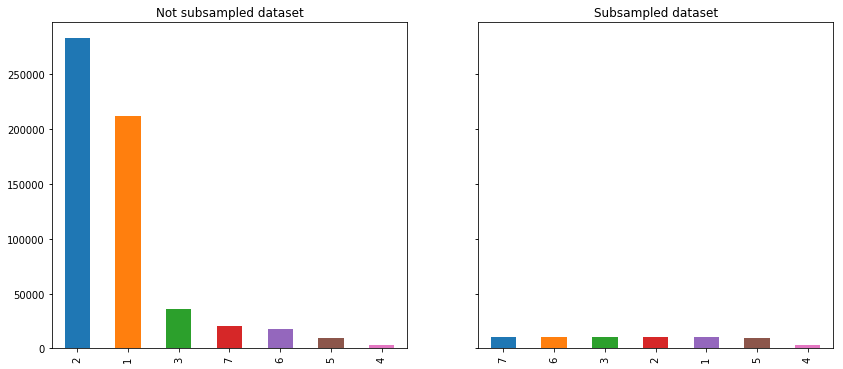

In [77]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14,6))
df.Cover_Type.value_counts().plot(kind="bar", ax=ax1, title="Not subsampled dataset")
ri.Cover_Type.value_counts().plot(kind="bar", ax=ax2, title="Subsampled dataset")
plt.show()

### Train / Test split

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(ri.drop(columns=["Cover_Type"]), ri.Cover_Type, test_size=0.15)

### Models

In [84]:
results = {}

#### Random Forest Classifier

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

grid = {'max_features' : np.arange(5, 9, 3),
        'n_estimators' : np.arange(30, 120, 60),
        'max_depth': np.arange(6, 13, 3),
        'min_samples_leaf': np.arange(1, 4, 1),
        'min_samples_split': np.arange(0.001, 0.3, 0.1)}

randf = GridSearchCV(RandomForestClassifier(), grid, cv=5, verbose=2, n_jobs=8).fit(X_train, y_train)
results["RandomForestClassifier"] = randf.best_score_.mean()
print("RandomForestClassifier best score: {:0.4f} for {}.".format(randf.best_score_.mean(), randf.best_params_))

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    7.3s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   38.6s


KeyboardInterrupt: 